**Bài 1:** Thực hiện lại các bước như hướng dẫn để xây dựng mô hình phân lớp Naive Bayes cho bài toán phân loại cảm xúc người dùng dựa trên bộ dữ liệu UIT-VSFC.

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Đọc dữ liệu

In [38]:
import pandas as pd
  # Đọc dữ liệu trên tập huấn luyện (train)
X_train = pd.read_csv('drive/MyDrive/train/sents.txt', sep='\n', header=None, index_col=None)
y_train = pd.read_csv('drive/MyDrive/train/sentiments.txt', sep='\n', header=None, index_col=None)
  # Đọc dữ liệu trên tập phát triển (development)
X_dev = pd.read_csv('drive/MyDrive/dev/sents.txt', sep='\n', header=None, index_col=None)
y_dev = pd.read_csv('drive/MyDrive/dev/sentiments.txt',sep='\n', header=None, index_col=None)
  # Đọc dữ liệu trên tập kiểu thử (test)
X_test = pd.read_csv('drive/MyDrive/test/sents.txt', sep='\n', header=None, index_col=None)
y_test = pd.read_csv('drive/MyDrive/test/sentiments.txt', sep='\n', header=None, index_col=None)

In [39]:
y_train

,0
0,2
1,2
2,0
3,0
4,2
...,...
11421,0
11422,2
11423,0
11424,2


In [40]:
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()

In [41]:
y_train

array([2, 2, 0, ..., 0, 2, 2])

2. Mã hoá dữ liệu bằng CountVectorizer

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

encoder = CountVectorizer(ngram_range=(2, 2))
encoder.fit(X_train[0])

CountVectorizer(ngram_range=(2, 2))

In [47]:
encoder.vocabulary_

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [48]:
X_train_encoded = encoder.transform(X_train[0])
X_dev_encoded = encoder.transform(X_dev[0])
X_test_encoded = encoder.transform(X_test[0])

3. Huấn luyện mô hình và dự đoán

**Mô hình Naive Bayes**

In [49]:
from sklearn.naive_bayes import MultinomialNB

model_NB = MultinomialNB()
model_NB.fit(X_train_encoded, y_train)

# Dự đoán nhãn và lưu vào biến y_pred_NB
y_pred_NB = model_NB.predict(X_test_encoded)

**Mô hình Logistic Regression**

In [50]:
from sklearn.linear_model import LogisticRegression

model_Reg = LogisticRegression()
model_Reg.fit(X_train_encoded, y_train)

# Dự đoán nhãn và lưu vào biến y_pred_Reg
y_pred_Reg = model_Reg.predict(X_test_encoded)

**Mô hình SVM**

In [51]:
from sklearn.svm import SVC

model_SVM=SVC(kernel = 'linear')
model_SVM.fit(X_train_encoded,y_train)

# Dự đoán nhãn và lưu vào biến y_pred_SVM
y_pred_SVM = model_SVM.predict(X_test_encoded)

**4. Đánh giá mô hình**

**Mô hình Naive Bayes**

In [52]:
from sklearn.metrics import accuracy_score, f1_score

print('Naive Bayes')
print('Accuracy : ',accuracy_score(y_test, y_pred_NB)*100)
print('macro F1-score :',f1_score(y_test, y_pred_NB, average='macro')*100)

Naive Bayes
Accuracy :  86.26026531901452
macro F1-score : 61.264058918064244


**Mô hình Logistic Regression**

In [53]:
print('Logistic Regresstion')
print('Accuracy : ',accuracy_score(y_test, y_pred_Reg)*100)
print('macro F1-score :',f1_score(y_test, y_pred_Reg, average='macro')*100)

Logistic Regresstion
Accuracy :  87.08149084017688
macro F1-score : 65.45099659996735


**Mô hình SVM**

In [55]:
print('SVM')
print('Accuracy : ',accuracy_score(y_test, y_pred_SVM)*100)
print('macro F1-score :',f1_score(y_test, y_pred_SVM, average='macro')*100)

SVM
Accuracy :  85.75489576753
macro F1-score : 67.45470242950846


**Trực quan hóa ma trận nhầm lẫn**

In [56]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred_NB)

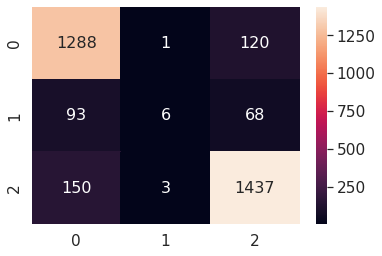

In [57]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**Bài 2:** Thay đổi cách mã hoá từ CountVectorizer thành TfIdfVectorizer ở Mục 2 (giữ nguyên n-gram). So sánh hiệu năng của mô hình Naive Bayes đối với 2 cách mã hoá (sử dụng độ đo macro F1-score và ma trận nhầm lẫn để so sánh).

**Mã hoá dữ liệu**

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

encoder_2 = TfidfVectorizer(ngram_range=(2, 2))
encoder_2.fit(X_train[0])

TfidfVectorizer(ngram_range=(2, 2))

In [59]:
encoder_2.vocabulary_

{'slide giáo': 19651,
 'giáo trình': 7042,
 'trình đầy': 23733,
 'đầy đủ': 30215,
 'nhiệt tình': 15712,
 'tình giảng': 24486,
 'giảng dạy': 7216,
 'dạy gần': 5850,
 'gần gũi': 7752,
 'gũi với': 7734,
 'với sinh': 27898,
 'sinh viên': 19599,
 'đi học': 29041,
 'học đầy': 9663,
 'đủ full': 31210,
 'full điểm': 6736,
 'điểm chuyên': 29158,
 'chuyên cần': 1996,
 'chưa áp': 2398,
 'áp dụng': 28786,
 'dụng công': 6383,
 'công nghệ': 4229,
 'nghệ thông': 14845,
 'thông tin': 21499,
 'tin và': 22823,
 'và các': 26723,
 'các thiết': 3263,
 'thiết bị': 20690,
 'bị hỗ': 1334,
 'hỗ trợ': 9803,
 'trợ cho': 24094,
 'cho việc': 1928,
 'việc giảng': 26506,
 'thầy giảng': 21839,
 'giảng bài': 7185,
 'bài hay': 567,
 'hay có': 7940,
 'có nhiều': 3872,
 'nhiều bài': 15482,
 'bài tập': 670,
 'tập ví': 25371,
 'ví dụ': 27343,
 'dụ ngay': 6325,
 'ngay trên': 14592,
 'trên lớp': 23548,
 'giảng viên': 7312,
 'viên đảm': 26412,
 'đảm bảo': 30149,
 'bảo thời': 1145,
 'thời gian': 22458,
 'gian lên': 6862,
 'lên

In [60]:
X_train_encoded_2 = encoder_2.transform(X_train[0])
X_dev_encoded_2 = encoder_2.transform(X_dev[0])
X_test_encoded_2 = encoder_2.transform(X_test[0])

**Huấn luyện mô hình và dự đoán**

**Mô hình Naive Bayes**

In [61]:
model_NB_2 = MultinomialNB()
model_NB_2.fit(X_train_encoded_2, y_train)

# Dự đoán nhãn và lưu vào biến y_pred_NB_2
y_pred_NB_2 = model_NB_2.predict(X_test_encoded_2)

**Mô hình Logistic Regression**

In [62]:
model_Reg_2 = LogisticRegression()
model_Reg_2.fit(X_train_encoded_2, y_train)

# Dự đoán nhãn và lưu vào biến y_pred_Reg_2
y_pred_Reg_2 = model_Reg_2.predict(X_test_encoded_2)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Mô hình SVM**

In [63]:
model_SVM_2=SVC(kernel = 'linear')
model_SVM_2.fit(X_train_encoded_2, y_train)

# Dự đoán nhãn và lưu vào biến y_pred_SVM_2
y_pred_SVM_2 = model_SVM_2.predict(X_test_encoded_2)

**Đánh giá mô hình**



**Mô hình Naive Bayes**

In [64]:
print('Naive Bayes')
print('Accuracy : ',accuracy_score(y_test, y_pred_NB_2)*100)
print('macro F1-score :',f1_score(y_test, y_pred_NB_2, average='macro')*100)

Naive Bayes
Accuracy :  86.35502210991788
macro F1-score : 59.09980504824439


**Mô hình Logistic Regression**

In [65]:
print('Logistic Regresstion')
print('Accuracy : ',accuracy_score(y_test, y_pred_Reg_2)*100)
print('macro F1-score :',f1_score(y_test, y_pred_Reg_2, average='macro')*100)

Logistic Regresstion
Accuracy :  86.29185091598231
macro F1-score : 62.33059320033595


**Mô hình SVM**

In [66]:
print('SVM')
print('Accuracy : ',accuracy_score(y_test, y_pred_SVM_2)*100)
print('macro F1-score :',f1_score(y_test, y_pred_SVM_2, average='macro')*100)

SVM
Accuracy :  87.52368919772584
macro F1-score : 64.7353043608671


**Confusion matrix**

In [67]:
cf_2 = confusion_matrix(y_test, y_pred_NB_2)

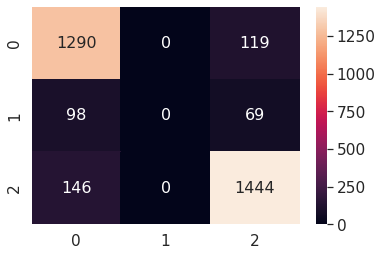

In [68]:
df_cm_2 = pd.DataFrame(cf_2, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm_2, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**SO SÁNH HIỆU NĂNG CỦA MÔ HÌNH NAIVE BAYES ĐỐI VỚI HAI CÁCH MÃ HÓA CountVectorizer VÀ TfIdfVectorizer:**

Nhìn chung mã hóa từ CountVectorizer cho F1 Score **lớn hơn** so với mã hóa từ TfIdfVectorizer.
Từ ma trận nhầm lẫn ta có:
Ở trường hợp 0(negative) và 2(positive) thì mã hóa từ CountVectorizer cho ít kết quả đúng hơn so với TfIdfVectorizer.

**Từ đó suy ra được:** Mã hóa bằng CountVectorizer cho hiệu năng của mô hình Naive Bayes **tốt hơn** so với mã hóa bằng TfIdfVectorizer.

**Bài 3*:** Sử dụng thêm mô hình Logistic Regression và SVM kết hợp với 2 phương pháp mã hoá CountVectorizer và TfIdfVectorizer để so sánh hiệu quả giữa các phương pháp. Độ đo đánh giá sử dụng: macro F1-score.

**CountVectorizer**

**Logistic Regression **

In [95]:
from sklearn.linear_model import LogisticRegression
LogReg1 = LogisticRegression()
LogReg1.fit(X_train_encoded,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [97]:
y_pred_LogReg1 = LogReg1.predict(X_test_encoded)

In [98]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred_LogReg1)*100)
print(f1_score(y_test, y_pred_LogReg1, average='macro')*100)

86.29185091598231
62.33059320033595


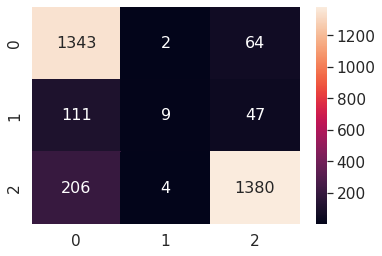

In [99]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_LogReg1)
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**CountVectorizer**

**SVM**

In [100]:
from sklearn.svm import SVC

In [102]:
SVModel1=SVC(kernel='linear', probability = True)
SVModel1.fit(X_train_encoded,y_train)

SVC(kernel='linear', probability=True)

In [103]:
y_pred_SVM1 = SVModel1.predict(X_test_encoded)

In [104]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred_SVM1)*100)
print(f1_score(y_test, y_pred_SVM1, average='macro')*100)

87.52368919772584
64.7353043608671


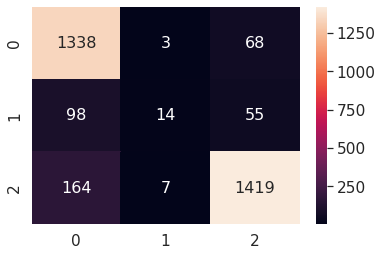

In [105]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_SVM1)
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**Nhận xét:** Đối với mã hóa CountVectorizer

Mô hình cho f1-score tốt nhất là SVM(64.73), tiếp theo là LogisticRegression(62.33), cuối cùng là Navie Bayes (61.26)

**TfidfVectorizer**

LogistcRegression: **văn bản in đậm**

In [107]:
from sklearn.linear_model import LogisticRegression
LogReg2 = LogisticRegression()
LogReg2.fit(X_train_encoded_2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [109]:
y_pred_LogReg2 = LogReg2.predict(X_test_encoded_2)

In [110]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred_LogReg2)*100)
print(f1_score(y_test, y_pred_LogReg2, average='macro')*100)

86.29185091598231
62.33059320033595


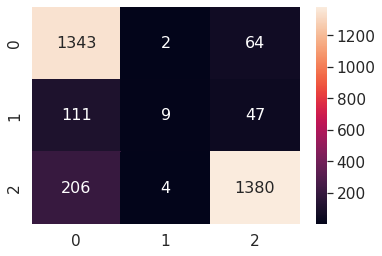

In [111]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_LogReg2)
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**TfidfVectorizer**

**SVM**

In [87]:
from sklearn.svm import SVC
SVModel2=SVC(kernel='linear', probability = True)
SVModel2.fit(X_train_encoded_2,y_train)

SVC(kernel='linear', probability=True)

In [89]:
y_pred_SVM2 = SVModel2.predict(X_test_encoded_2)

In [90]:
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(y_test, y_pred_SVM2)*100)
print(f1_score(y_test, y_pred_SVM2, average='macro')*100)

87.52368919772584
64.7353043608671


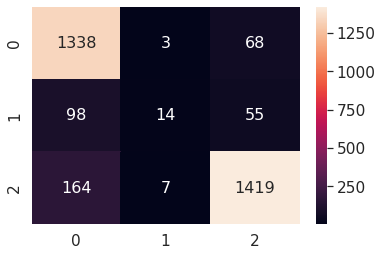

In [91]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred_SVM2)
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cf, range(3), range(3))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.show()

**Nhận xét:** Đối với mã hóa TfidfVectorizer

Mô hình cho f1-score tốt nhất là SVM(64.74), tiếp theo là LogisticRegression(62.33), cuối cùng là Navie Bayes(59.1).
**Kết luận:** Với mô hình SVM(Support Vector Machine) và phương pháp CountVectorizer thì cho ra hiệu năng mô hình cao nhất.